In [5]:
%matplotlib inline

import numpy as np
import pylab as plt

PyGDSM quickstart - Haslam and LFSS
-----------------------------------


This notebook is the documentation for the PyGDSM interface to the LWA1 LFSS and a Haslam+spectral index sky model.

#### The LWA1 Low Frequency Sky Survey
###### J. Dowell, G. B. Taylor, F. Schinzel, N. E. Kassim, K. Stovall
[MNRAS, 469, 4, 4537-4550 (2017)](https://ui.adsabs.harvard.edu/abs/2017MNRAS.469.4537D/abstract)

#### An improved source-subtracted and destriped 408-MHz all-sky map 
###### M. Remazeilles, C. Dickinson,A.J. Banday,  M. Bigot-Sazy, T. Ghosh
[MNRAS 451, 4, 4311-4327 (2014)](https://ui.adsabs.harvard.edu/abs/2015MNRAS.451.4311R/abstract)


Firstly, we import the `pygdsm` module:

In [1]:
from pygdsm import HaslamSkyModel, LowFrequencySkyModel

We can very quickly get started with generating a sky map and plotting it:

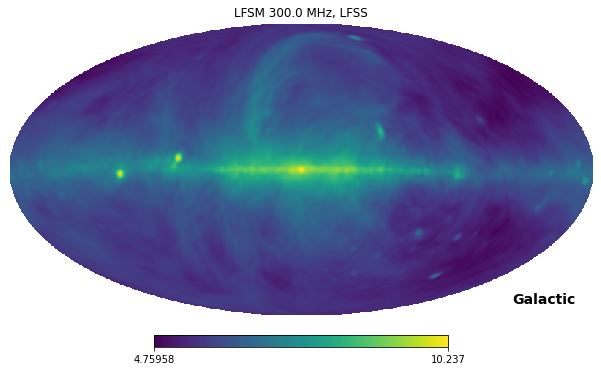

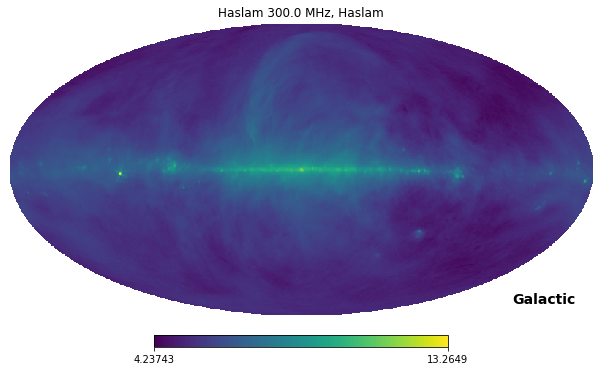

In [3]:
lfss = LowFrequencySkyModel(freq_unit='MHz')
lfss.generate(300)
lfss.view(logged=True)

haslam = HaslamSkyModel(freq_unit='MHz', spectral_index=-2.55)
haslam.generate(300)
haslam.view(logged=True)

We might then want to write this to a FITS file (in healpix format):

Just in case you're interested in spectral cubes, you can even pass a frequency range:

(10, 3145728)
(10, 786432)


Text(0, 0.5, 'Temperature [K]')

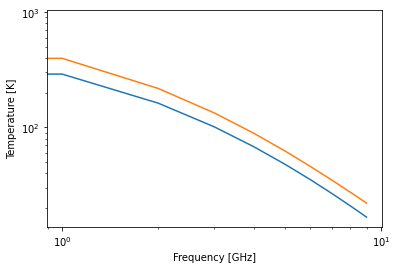

In [8]:
gsm = HaslamSkyModel(freq_unit='MHz')
freqs = np.linspace(100, 400, 10)
map_cube = gsm.generate(freqs)

print(map_cube.shape)
plt.loglog(map_cube[:,100])  # Random pixel
plt.xlabel("Frequency [GHz]")
plt.ylabel("Temperature [K]")

gsm = LowFrequencySkyModel(freq_unit='MHz')
map_cube = gsm.generate(freqs)

print(map_cube.shape)
plt.loglog(map_cube[:,100])  # Random pixel
plt.xlabel("Frequency [GHz]")
plt.ylabel("Temperature [K]")

Be careful with this one though, as it can eat up a lot of memory!

## Generate observed sky for a given lat, long

A common task is to find out what the sky looks like at a given lat, long and date. `PyGSM` gives a quick method to do this:

/Users/dancpr/Data/pygdsm/pygdsm/haslam.py:53: AstropyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  self.data = hp.read_map(self.fits, verbose=False, dtype=np.float64) - T_cmb


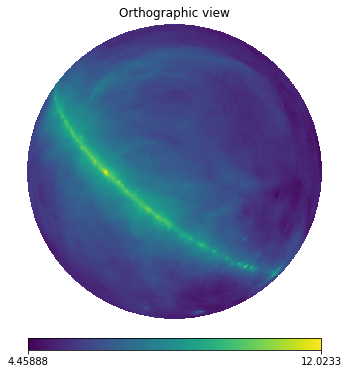

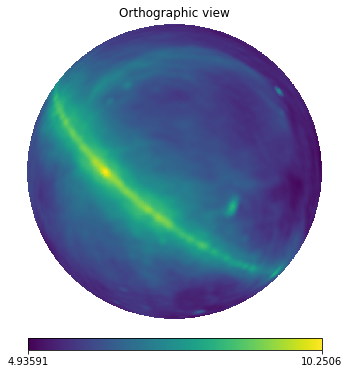

In [13]:
from pygdsm import HaslamObserver, LFSMObserver
from datetime import datetime

# Setup observatory location - in this case, Parkes Australia
(latitude, longitude, elevation) = ('-32.998370', '148.263659', 100)

ov = HaslamObserver()
ov.lon = longitude
ov.lat = latitude
ov.elev = elevation
ov.date = datetime(2000, 1, 1, 23, 0)
ov.generate(300)
d = ov.view(logged=True)

# LFSM
ov = LFSMObserver()
ov.lon = longitude
ov.lat = latitude
ov.elev = elevation
ov.date = datetime(2000, 1, 1, 23, 0)
ov.generate(300)
d = ov.view(logged=True)

Now generate a sky model and view an all-sky orthographic plot

And we can view galactic Mollweide projection too, with below-horizon data blanked out:

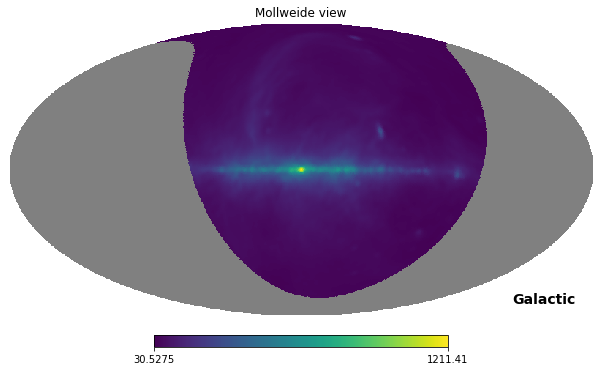

In [14]:
d = ov.view_observed_gsm()